Importando as bibliotecas

In [7]:
import numpy as np
import pandas as pd
from textblob import TextBlob
import tweepy
from os import path
from textblob import TextBlob as tb
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)
import matplotlib.pyplot as plt
import sys
from importlib import reload
import imp
from textblob.classifiers import NaiveBayesClassifier
import os
import re
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk import RegexpParser
from nltk import Tree

Autenticação no Twitter

In [8]:
consumer_key = 'Jg95VukOglg6RIqRrqt6GYRoa'
consumer_secret = 'ZvH3Oz7jFN0OvDMXGtRriTqOOykGnUgqxAU0wNKWhMElII0ivq'
access_token = '971179238396227584-KkOSGzCwhzv0lokz55Dkp1wTjyurnkW'
access_token_secret = 'y2NNUWU1tlhQYMOps49aSKgckRqTu7T7dPWpyNbMeXvAA'

Login na API do Twitter

In [24]:
def get_all_tweets(screen_name):
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth)
    alltweets = []
    new_tweets = api.search(screen_name)
    alltweets.extend(new_tweets)
    oldest = alltweets[-1].id - 1
    while len(new_tweets) > 0:
        new_tweets = api.search(screen_name,count=200,max_id=oldest)
        alltweets.extend(new_tweets)
        oldest = alltweets[-1].id - 1
    outtweets = [[tweet.id_str, tweet.created_at, tweet.text.encode("utf-8")] for tweet in alltweets]
    return outtweets

Recupera todos os tweets

In [26]:
tweets = get_all_tweets("@falanext")
df = pd.DataFrame(tweets, columns=['id','created_at','text'])
df

,id,created_at,text
0,1057524735310000134,2018-10-31 06:48:39,b'@falanext Uma vergonha que essa conta n\xc3\...
1,1057518995547570176,2018-10-31 06:25:50,b'@falanext eu queria tanto a carteira e a cam...
2,1057483637149577217,2018-10-31 04:05:20,"b'@aquelecaioIa @falanext vantagens: mimos, de..."
3,1057473595394396160,2018-10-31 03:25:26,b'@opeterquill @falanext Olouco'
4,1057465948721033216,2018-10-31 02:55:03,"b'@falanext At\xc3\xa9 o momento n\xc3\xa3o, f..."
5,1057462401518440448,2018-10-31 02:40:57,b'qse 10 dias uteis e nada do meu cartao @fala...
6,1057445284781977600,2018-10-31 01:32:56,b'atendimento do @falanext \xc3\xa9 muito ruim...
7,1057423190278979584,2018-10-31 00:05:09,b'@falanext me ajuda a te ajudar'
8,1057420936549412864,2018-10-30 23:56:11,b'@falanext Ol\xc3\xa1 pessoal Next. Preciso e...
9,1057412553247207429,2018-10-30 23:22:53,b'RT @falanext: @GiovaniMota Ol\xc3\xa1! Respo...


Função para limpeza dos dados

In [304]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()
testing = df.text[:100]
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))
test_result

AttributeError: 'DataFrame' object has no attribute 'text'

Read the whole text

In [151]:
text = open( 'tweets_noun_phrases.txt').read()
stopwords = set(STOPWORDS)

FileNotFoundError: [Errno 2] No such file or directory: 'tweets_noun_phrases.txt'

Mostrar a nuvem de palavras

(-0.5, 399.5, 199.5, -0.5)

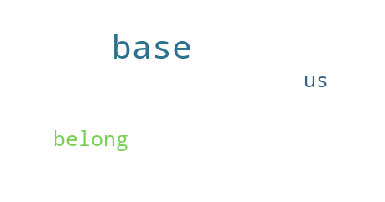

In [152]:
wordcloud = WordCloud(max_font_size=40,stopwords=STOPWORDS,background_color='white').generate(text)
wordcloud.to_file("nouns_user.png")
plt.imshow(wordcloud)
plt.axis("off")

Variável que irá armazenar todos os Tweets com a palavra escolhida na função search da API

In [27]:
public_tweets = api.search('@falanext')

NameError: name 'api' is not defined

Léxico ReLi - análise de sentimentos em português

In [308]:
base_path = 'ReLi-Lex'
train = []
files = [os.path.join(base_path, f) for f in os.listdir(base_path)]

Ler o léxico ReLi na pasta de arquivos

In [309]:
for file in files:
    t = 'pos' if '_Positivos' in file else 'neg'
    with open(file, 'r') as content_file:
        content = content_file.read()
        all = re.findall('\[.*?\]',content)
        for w in all:
            train.append((w[1:-1], t))

cl = NaiveBayesClassifier(train)

Imprimir a classificação dos tweets se positivo ou negativo e, em seguida, os tweets 

In [310]:
dados = {}
for tweet in public_tweets:
    blob = tb(tweet.text, classifier=cl)
    for s in blob.sentences:
        print("[%s] %s" % (s.classify(), s))

[pos] @falanext Bob
[pos] @falanext Olha https://t.co/cY2kqOwH6u
[pos] @falanext Vai demorar muito para que meu crédito seja disponibilizado?
[pos] Não trate como @nubank  quem te trata como @falanext ... simples assim https://t.co/Pkkz5YCkRD
[pos] @falanext @falanext o plano do meu cartão é "na faixa" esse plano impede que eu tenha crédito no cartão?
[pos] @falanext Mandei no inbox.
[pos] @falanext Vou tentar fazer isso agora
[pos] @falanext Faz meses que não consigo fazer nada, a função crédito está bloqueada e ninguém resolve só ficam me enrolando
[pos] @falanext https://t.co/ycZHrq2Dxn
[neg] @falanext Não consigo porque aparece o erro 404
[neg] @falanext sério, o atendimento desse banco é uma bosta, você quer resolver alguma coisa mas só fica falando com aqu… https://t.co/zVDwM6CSZR
[pos] @falanext Não consigo desbloquear ele :(
[pos] RT @falanext: next tem conta + cartão de crédito grátis e desconto em Uber, iFood, Cinemark e outras marcas.
[pos] Baixe o app e vem!
[pos] https://t

Print das informações em formato de dataframe

Consolidação ou contagem de positivos e negativos

Gráfico da análise de sentimentos, baseado na classificação de Naive-Bayes